# **데이터 크롤링**

## **크롤링이란?**
> 크롤러(crawler)는 자동화된 방법으로 웹을 탐색하는 컴퓨터 프로그램  
'웹 크롤링'(web crawling)??  
'데이터 크롤링'(data crawling)!!  

우리는 매일 크롤러도 사용하고 있습니다.

## **웹 크롤링**
> 웹 서비스 내 정보를 수집하는 일

>> 필요한 정보가 있다면?  
API 확인 -> 없으면 직접 크롤링  
    
> 다만 서비스 제공자의 입장에서는??

### 웹 서핑을 하는 의식의 흐름
> - 브라우저 오픈  
- 원하는 인터넷페이지 주소 입력  
- 화면이 열리면 찾고자 하는 정보를 스크롤 하면서 찾기  
- 문자, 그림, 동영상 조회  

### 웹 크롤링 하는 의식의 흐름
> - 정보를 가져오고자 하는 url 정의
- url 정보로 requests로 정보 요청
- text 정보를 html로 변환
- html에서 우리가 필요한 정보만 선별

### 웹 크롤링을 위해 BeautifulSoup 사용
> - requests는 요청을 받기는 하지만 text로만 받음  
- API는 통신을 위해 정형화 된 데이터 형태의 text  
- 우리가 원하는 데이터로 가공하기 위해 편의상 html로 변환  
- text를 html로 변환하는 모듈이 beautifulSoup

### 간단한 데이터 크롤링으로 기본 개념잡기

In [170]:
# 필요패키지 import
import numpy as np
import pandas as pd
import requests # 크롤링에 사용하는 패키지
from bs4 import BeautifulSoup # html 변환에 사용함

# url정의 # 문자열
url = 'http://naver.com'

# requests로 url에 정보요청, 자주하면 막힐 수 있으니, 요청은 한번에 끝내자 (변수로 저장)
# response = requests.get(url)

# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(response.text, 'html.parser')

# html 내에서 우리가 보고 싶은 정보만 선별
# html.select('img')

[<img alt="" height="49" src="https://static-whale.pstatic.net/main/img_darkmode@2x.png" style="padding-left: 48px" width="303"/>,
 <img alt="이데일리" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/018.png"/>,
 <img alt="조선비즈" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/366.png"/>,
 <img alt="마이데일리" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/117.png"/>,
 <img alt="한겨레" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/028.png"/>,
 <img alt="서울신문" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/081.png"/>,
 <img alt="YTN" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/052.png"/>,
 <img alt="스포츠동아" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/314.png"/>,
 
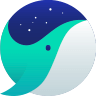
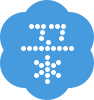

In [11]:
# requests가 정상적으로 됐는지 확인 => Response [200] : 정상
# response
# response.text  # 정보는 가져왔지만, html형시이라 확인이 어렵다 -> beautifulsoup활용
html # reponse.text 보다는 보기 편함
html.select('img')   # html 내에서 우리가 보고 싶은 정보만 선별

In [21]:
# 다음 뉴스 페이지 크롤링
url2 = 'https://news.daum.net/'
# response2 = requests.get(url2)
html2 = BeautifulSoup(response2.text, 'html.parser')
html2


<!DOCTYPE html>

<html class="os_unknown none unknown version_0" lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="always" name="referrer">
<meta content="Daum 뉴스" property="og:author"/>
<meta content="다음뉴스" property="og:site_name"/>
<meta content="홈" property="og:title"/>
<meta content="https://t1.daumcdn.net/media/img-media/mobile/meta/news.png" property="og:image"/>
<meta content="다음뉴스" property="og:description"/>
<meta content="https://news.daum.net/" property="og:url"/>
<link href="https://m2.daumcdn.net/img-media/2010ci/Daum_favicon.ico" rel="shortcut icon"/>
<title>홈 | 다음뉴스</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="//t1.daumcdn.net/media/kraken/news/758b62f/common.css.merged.css" rel="stylesheet" type="text/css">
<link href="//t1.daumcdn.net/media/kraken/news/758b62f/news.css.merged.css" rel="stylesheet" type="text/css"/>
<link href="//t1.daumcdn.net/media/kraken/news/758b62f/calendar.css.merged.css" rel="stylesheet" type="text/css"/>
<!-

### 실제 개발자가 작성한 코드로 확인된다
> 정제되지 않은 데이터로 가독성이 좋지 않음  
우리는 이 중에서 우리가 원하는 정보를 선별해서 가져오는 작업을 진행합니다.  
그러기에 html의 기본 구성을 살펴보도록 하겠습니다.  

#### 웹 페이지의 구성
> **HTML(Hyper Text Markup Language)**  
www 를 구성하는데 사용하는 국제표준 언어로서 컨텐츠와 레이아웃을 담고 있다

> **<태그>** 내용 **</태그>**  
<tag이름 class="class이름1 class이름2" id="주민번호" href="주소"></tag이름>

> 형태나 속성을 묘사하기 위한 구조적 언어 : HTML, CSS (계층이 있음)  
웹의 작동 및 제어를 위한 프로그래밍 언어 :  Js

#### 셀렉터
> 용도 : html에서 내가 원하는 내용을 찾아내기 위해서  
<span class="news" id="1234">비비고 왕교자</span>

>> 단일 셀렉터  
html.select('span')  
tag : span  
class(별명, 그룹명) : .news  

>> 클래스 포함 셀렉터
html.select('span.news')    # 위에 <span class="news" id="1234">비비고 왕교자</span> 사용

>> id 포함 셀렉터 하나만 가져오고 싶을떄
id(고유값) : #1234
html.select('span#1234')

#### 복합 셀렉터
    1. 조합 셀렉터
    <span>1</span>
    <span class="txt">2</span>
    <em class="txt">3</em>
    
    태그 이름이 span이고 클래스 이름은 txt인 라인을 찾고 싶다. : span.txt 
    li 태그 중에서 id가 name 인 라인을 찾고\ 싶다. : li#name

    2. 경로 셀렉터
    <ul>
        <li><span>이걸 찾으려면?</span></li>
    </ul>
    <span>이건 아님</span>

    ul 태그안 li 태그 안 span 라인을 찾는다
    ul > li > span 혹은 ul li span

In [25]:
# 크롬->보기->개발자도구 -> 왼쪽위 select 아이콘으로 원하는 창 클릭 -> html 클래스 확인
html2.select('a.link_txt')  # a 안에 link_txt라는 class 정보를 다 가저옴 => 리스트 형식으로 들어가 있음
html2.select('a.link_txt')[0]
html2.select('a.link_txt')[0].text

'가덕도 신공항, 개발 착수.."환경 고려" 제주2공항 속도 조절'

In [ ]:
# 슬의생 드라마소개 크롤링
# url5 = 'https://search.daum.net/search?w=tot&DA=UME&t__nil_searchbox=suggest&sug=&sugo=15&sq=tmfdm&o=2&q=%EC%8A%AC%EC%9D%98%EC%83%9D'
# response5 = requests.get(url5)

# html5 = BeautifulSoup(response5.text, 'html.parser')
html5.select('dd.cont')[0].text
    
for con in html5.select('dd.cont'):
    print(con.text)

In [119]:
# url= 'https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EC%8A%AC%EC%9D%98%EC%83%9D'
# response = requests.get(url)
# html = BeautifulSoup(response.text, 'html.parser')
for fit in html.select('a.fn_tit_u')[1:]:
    print(fit.text)

 문희경, '슬의생2'와 마지막 인사 "내 아들 김대명 안녕" [인스타] 
 '슬의생2' 종영..정문성 "도재학 아껴주셔서 감사" 
 [SC초점] 99즈 매력↑·반복구조..'슬의생2', '닫힌결말' 여정 종료 
 퇴근시간 되자 귀가한 99즈, '슬의생' 시즌3 가능성 '반반'인 이유 


In [86]:
import time

In [89]:
# url도 패턴을 찾으면 다양한 검색이 가능하다
dr_nm = ['도깨비','호텔델루나','슬의생']

# name = input("드라마 제목을 입력하세요 : ")
for name in dr_nm:
    # 순환은 빠름
    print(f'\n{name} 크롤링 중입니다 \n')
    url= f'https://search.daum.net/search?w=tot&DA=UME&t__nil_searchbox=suggest&sug=&sugo=15&sq=tmfdm&o=2&q={name}'
    
    # requests : 초당 40~50회 요청하게 됨 -> 기계가 요청하는것으로 판단해서 막힌다.
    # 차단막는 코드
    seed = np.random.randint(100) # seed 설정
    np.random.seed(seed)    # 시드 생성
    a = np.random.randint(5)  # 시드에서 난수 생성
    time.sleep(a)     # 코드실행 지연시키는 코드
    
    response = requests.get(url)
    
    html = BeautifulSoup(response.text, 'html.parser')
    print(html.select('dd.cont')[0].text)
print('\n크롤링 종료\n')


도깨비 크롤링 중입니다 

불멸의 삶을 끝내기 위해 인간 신부가 필요한 도깨비, 그와 기묘한 동거를 시작한 기억상실증 저승사자. 그런 그들 앞에 '도깨비 신부'라 주장하는 '죽었어야 할 운명'의 소녀가 나타나며 벌어지는 신비로운 낭만 설화 

호텔델루나 크롤링 중입니다 

엘리트 호텔리어가 운명적인 사건으로 호텔 델루나의 지배인을 맡게 되면서 달처럼 고고하고 아름답지만 괴팍한 사장과 함께 델루나를 운영하며 생기는 특별한 이야기를 그린 드라마

슬의생 크롤링 중입니다 

누군가는 태어나고 누군가는 삶을 끝내는, 인생의 축소판이라 불리는 병원에서 평범한 듯 특별한 하루하루를 살아가는 사람들과 눈빛만 봐도 알 수 있는 20년지기 친구들의 케미스토리를 담은 드라마
크롤링 종료


## 다음에서 로또번호 가져오기

In [34]:
# url 설정
url4 = 'https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EB%A1%9C%EB%98%90'

In [36]:
# requests로 데이터 요청하기
# response4 = requests.get(url4)

<Response [200]>

In [37]:
# html로 변환
html4 = BeautifulSoup(response4.text, 'html.parser')

In [104]:
# 데이터 선별
html4.select('div.lottonum')[0].text

' 3 13 16 23 24 35 보너스 14 '

## 다음에서 로또번호 가져와 볼께요 몽땅 다 가져옵니다

In [142]:
# 로또 좀 더 깔끔하게하려면 리스트에 넣어서 한번에 출력하는게 관리하기 좋아보인다

trial = [i for i in range(1,10)]
total_lotto=[]
for trial_count in trial:
    print(f'{trial_count}회차 크롤링 중입니다')
    url=f'https://search.daum.net/search?w=tot&DA=LOT&rtmaxcoll=LOT&&q={trial_count}%ED%9A%8C%EC%B0%A8%20%EB%A1%9C%EB%98%90'

    seed = np.random.randint(100) # seed 설정
    np.random.seed(seed)    # 시드 생성
    a = np.random.randint(5)  # 시드에서 난수 생성
    time.sleep(a)     # 코드실행 지연시키는 코드
    
    response = requests.get(url)
    
    html = BeautifulSoup(response.text, 'html.parser')
    total_lotto.append(html.select('div.lottonum')[0].text)
print('\n크롤링 종료')

1회차 크롤링 중입니다
2회차 크롤링 중입니다
3회차 크롤링 중입니다
4회차 크롤링 중입니다
5회차 크롤링 중입니다
6회차 크롤링 중입니다
7회차 크롤링 중입니다
8회차 크롤링 중입니다
9회차 크롤링 중입니다

크롤링 종료


In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


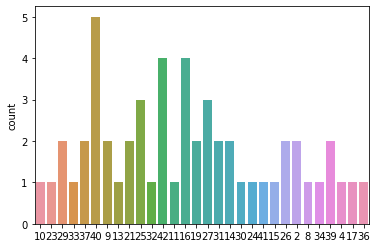

In [197]:
# 좀 다듬어보자

total_lotto
lotto_array = np.array(total_lotto)
new=[]
for i in lotto_array:
    new.append(i.split(' '))
new
a=[]
for i in new:
    a.append(i[1:7])
a=np.array(a)
a.reshape(-1,)

sns.countplot(a.reshape(-1,))
plt.show()

In [121]:
requests.codes.ok
# 100 우리 이런정보 내주는거야
# 200 성공
# 300 우리 이 사이트 이리루 이사했어 일루가
# 400 유저가 요청을 잘못한경우
# 500 서버 문제

200

In [ ]:
# 차단막는 코드
seed = np.random.randint(100)
np.random.seed(seed)
a = np.random.randint(5)

In [ ]:
<a href="https://cafe.naver.com/getampethskin/651937" class="api_txt_lines total_tit _cross_trigger" data-cr-gdid="90000004_01112BC60009F2A100000000" target="_blank" onclick="return goOtherCR(this, 'a=rvw*t.link&amp;r=1&amp;i=90000004_01112BC60009F2A100000000&amp;u='+urlencode(this.href))"><mark>코로나</mark> 걸리는게 전 더 무서워요</a>

## **네이버 키워드로 검색한 결과를 크롤링**

In [181]:
search = input("키워드를 입력하세요 : ")
# search='코로나'
url=f'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query={search}'

response = requests.get(url)
if(response.status_code == requests.codes.ok):
    print('접속성공\n')
    html = BeautifulSoup(response.text, 'html.parser')

else:
    print('크롤링 실패')

for name in html.select('a.api_txt_lines'):
    print(name.text, name.attrs['href'])  # name.attrs['href']로 새로운 링크를 가져옴
    
    temp_url = name.attrs['href']    # 이런식으로 추가 작업이 가능함 (이후, requrest를 다시)

키워드를 입력하세요 : 세탁기
접속성공

설치까지 완벽한 위닉스 세탁기건조기 환영해 https://blog.naver.com/dngusghk/222470214924
LG 트윈워시 드럼세탁기 분해 청소 비용, 가격 및 후기 https://blog.naver.com/aejiniyam/222473577816
드럼세탁기세탁조클리너 아직도 안써봄? https://blog.naver.com/marianne40/222503916107
김포세탁기청소 퀴퀴한 냄새 제거하기 https://blog.naver.com/totos1207/222478318008
세탁기통세척 이젠 상쾌한 향만~ https://cafe.naver.com/ungsangjang/414104
이사하시나요? 세탁기 냉장고등 가전이 필요하신가요? https://adcr.naver.com/adcr?x=a2t1FVCEPeM4yKNekHDTM////w==kQyFG8fxOUKTAAEUUjwdhhROsA3d+SHAwOiqwsJFYQ2uV3HhUuKOv649P3hyJ4a/FJjpjLEigwMBanNy0EDcFsmPy2txhVyoAoJLOgqrlnplWpqxKvnNLvEZJcM6EjsDyZQBVJy5NddGaOXs+pjiU0J5ydTgXq1CEhD2pCGcqch+6iK3O62vWR7Vn81TFUjaH2hKyWXHHOFlICY2UxrE3TFk71GY9Y5zKWK+cBUm7rPYZyWy/Kyyqx/JZJPQ/3hmFU8IZwSMa1kILk0F3Exkkj6OsapJfub+4N//YWKfCBd7xpBzyJupGs90A7UPLxYQrSj1WGoUOtfp57+xIPgWus9jR2Skcee+cATg8vp9F4NAPS5lx6tgqltdXEbPRWmVotQ/GzpWQ5ove4BcgdrFY8RMRAudRoyrNgeUUU5DLe2xnnJCc/WqGpafI6AZVOVCPUjwS7EWF5jsDy4vN4VqYpqCv5YSDaf8chnvI4JLiW6Zap1OHDXIzNT9x1ZZYqy332FJjE1NaweBVgqiL2RCEis0teeEu2cAnQkYU